In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

In [2]:
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

In [3]:
matplotlib.matplotlib_fname()

'c:\\Users\\User\\Documents\\GitHub\\Anime_View_Number_Regression\\.venv\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [4]:
df = pd.read_csv('./BaHaMut_3.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      447 non-null    int64  
 1   動畫名     447 non-null    object 
 2   總觀看數    447 non-null    int64  
 3   平均觀看數   447 non-null    int64  
 4   年份      447 non-null    int64  
 5   月份      447 non-null    object 
 6   集數      447 non-null    int64  
 7   星級      447 non-null    float64
 8   評分人數    447 non-null    int64  
 9   導演監督    445 non-null    object 
 10  台灣代理    447 non-null    object 
 11  製作廠商    447 non-null    object 
 12  作品分類1   447 non-null    object 
 13  作品分類2   439 non-null    object 
 14  作品分類3   319 non-null    object 
 15  作品分類4   140 non-null    object 
 16  作品分類5   44 non-null     object 
 17  作品分類6   4 non-null      object 
 18  原作載體    447 non-null    object 
 19  新續作     447 non-null    object 
dtypes: float64(1), int64(6), object(13)
memory usage: 70.0+ KB


In [6]:
df.tail(40)

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
407,531,昨日之歌,927000,51500,2020,春番,18,4.7,2207,藤原佳幸,木棉花,動畫工房,戀愛,青春,NaN,NaN,NaN,NaN,漫畫改編,新作
408,532,阿爾蒂,573000,47750,2020,春番,12,4.8,1433,濱名孝行,木棉花,Seven Arcs,勵志,職場,NaN,NaN,NaN,NaN,漫畫改編,新作
409,533,辣妹與恐龍,904000,75333,2020,春番,12,4.9,3499,青木純,木棉花,Space Neko Company、神風動畫,喜劇,溫馨,NaN,NaN,NaN,NaN,漫畫改編,新作
410,534,小書痴的下剋上：為了成為圖書管理員不擇手段！第二季,1430000,119167,2020,春番,12,4.9,3100,本郷みつる,木棉花,亞細亞堂,奇幻,異世界,勵志,NaN,NaN,NaN,小說改編,續作
411,535,辣妹與恐龍 真人版,261000,21750,2020,春番,12,4.5,814,大塚貴彦、須藤孝太郎,木棉花,HALO,喜劇,溫馨,真人演出,NaN,NaN,NaN,漫畫改編,新作
412,536,棒球大聯盟 2nd 第二季,857000,34280,2020,春番,25,4.8,516,渡邊步,曼迪,OLM,青春,運動,競技,闔家觀賞,NaN,NaN,漫畫改編,續作
413,537,遊戲王! SEVENS,14000,280,2020,春番,50,4.3,78,近藤信宏,羚邦,Bridge,勵志,競技,闔家觀賞,NaN,NaN,NaN,漫畫改編,新作
414,538,新櫻花大戰,332000,27667,2020,春番,12,4.2,589,小野學,羚邦,SANZIGEN,動作,科幻,機甲,NaN,NaN,NaN,遊戲改編,新作
415,539,文豪與鍊金術師～審判的齒輪～,334000,25692,2020,春番,13,4.6,470,渡邊穩寬,羚邦,OLM,冒險,奇幻,NaN,NaN,NaN,NaN,遊戲改編,新作
416,540,隱瞞之事,1579000,131583,2020,春番,12,4.9,6418,村野佑太,提恩傳媒,亞細亞堂,溫馨,親情,感人,職場,NaN,NaN,漫畫改編,新作


In [7]:
print(df['作品分類1'].unique())
print(df['作品分類2'].unique())
print(df['作品分類3'].unique())
print(df['作品分類4'].unique())
print(df['作品分類5'].unique())
print(df['作品分類6'].unique())

['奇幻' '冒險' '親情' '動作' '異世界' '校園' '戀愛' '科幻' '喜劇' '運動' '青春' '偶像' '超能力' '機甲'
 '悠閒' '溫馨' '推理' '歷史' '懸疑' '料理' '勵志' '魔法' '競技' '靈異神怪' '職場']
['戀愛' '奇幻' '偶像' '冒險' '科幻' '青春' '溫馨' '機甲' '魔法' '歷史' '競技' '校園' '喜劇' '懸疑'
 '靈異神怪' '勵志' '超能力' '音樂' '推理' nan '泡麵番' '血腥暴力' '運動' '異世界' '親情' 'BL' '闔家觀賞'
 '戰爭' '悠閒' '職場' '料理']
[nan '勵志' '懸疑' '異世界' '喜劇' '推理' '青春' '奇幻' '音樂' '校園' '魔法' '黑暗' '戀愛' '靈異神怪'
 '運動' '偶像' '科幻' '溫馨' '戰爭' '悠閒' '親情' '職場' '感人' '競技' '歷史' '血腥暴力' '泡麵番' '料理'
 'BL' '闔家觀賞' '超能力' '機甲' '真人演出']
[nan '溫馨' '血腥暴力' '職場' '戰爭' '喜劇' '音樂' '戀愛' '科幻' '超能力' '異世界' '運動' '料理'
 '靈異神怪' '競技' '青春' '勵志' '闔家觀賞' '魔法' '黑暗' '特攝' '親情' '偶像' '時間穿越' 'BL' '推理'
 '校園' '機甲' 'GL' '泡麵番' '歷史' '懸疑']
[nan '溫馨' '勵志' '競技' 'GL' '音樂' '泡麵番' '靈異神怪' '感人' '校園' '黑暗' '魔法' '戀愛' '職場'
 '喜劇' '推理' '闔家觀賞' '親情' '血腥暴力' '科幻']
[nan '靈異神怪' '血腥暴力' '闔家觀賞']


In [8]:
df.loc[df['動畫名'] == 'OVERLORD 第四季']

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
129,148,OVERLORD 第四季,4503000,346385,2022,夏番,13,4.9,14693,伊藤尚往,羚邦,MADHOUSE,冒險,奇幻,異世界,魔法,NaN,NaN,原創作品,新作


In [10]:
df.sort_values('總觀看數', ascending=False)

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
355,458,咒術迴戰,22381000,932542,2020,秋番,24,4.9,20200,朴性厚,羚邦,MAPPA,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,新作
152,185,SPY×FAMILY 間諜家家酒,17603000,704120,2022,春番,25,4.9,52703,古橋一浩,木棉花,WIT STUDIO×CloverWorks,動作,喜劇,親情,NaN,NaN,NaN,漫畫改編,續作
328,421,進擊的巨人 The Final Season,17210000,593448,2020,秋番,29,4.9,24841,林祐一郎,木棉花,MAPPA,動作,冒險,戰爭,血腥暴力,NaN,NaN,原創作品,新作
321,409,關於我轉生變成史萊姆這檔事 第二季,16078000,618385,2021,冬番,26,4.8,14097,中山敦史,木棉花,8bit,冒險,奇幻,異世界,魔法,喜劇,NaN,小說改編,續作
303,391,無職轉生，到了異世界就拿出真本事,12968000,540333,2021,冬番,24,4.9,25806,岡本学,木棉花,StudioBind,動作,冒險,奇幻,異世界,魔法,NaN,小說改編,續作
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,87,艦隊 Collection 總有一天，在那片海,14000,1750,2022,秋番,8,4.3,182,三浦和也,ANIPLUS,ENGI,機甲,歷史,戰爭,NaN,NaN,NaN,遊戲改編,續作
5,6,境界服務,13000,1083,2023,春番,12,3.8,84,迫井政行,ANIPLUS,Studio 3Hz,動作,科幻,喜劇,職場,NaN,NaN,原創作品,新作
236,302,暗夜第六感 2041,11000,917,2021,夏番,12,4.1,94,平川孝充,Aniplus,白組,超能力,科幻,NaN,NaN,NaN,NaN,原創作品,新作
18,19,魔法少女毀滅者,10000,833,2023,春番,12,3.1,125,博史池畠,ANIPLUS,Bibury Animation Studios,冒險,奇幻,喜劇,NaN,NaN,NaN,原創作品,新作


In [53]:
df[df['動畫名'] == 'OVERLORD 第四季']

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
129,148,OVERLORD 第四季,4503000,346385,2022,夏番,13,4.9,14693,伊藤尚往,羚邦,MADHOUSE,冒險,奇幻,異世界,魔法,NaN,NaN,原創作品,新作


In [58]:
df['平均觀看數'].describe()

count       447.000000
mean     104603.914989
std      134621.456301
min         280.000000
25%       18860.000000
50%       56083.000000
75%      137279.000000
max      932542.000000
Name: 平均觀看數, dtype: float64

<Axes: ylabel='平均觀看數'>

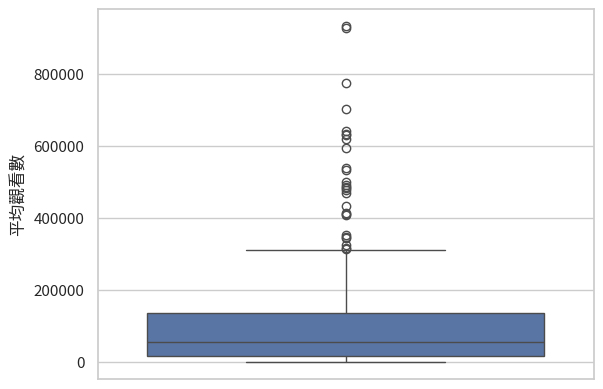

In [40]:
sns.boxplot(data=df['平均觀看數'])

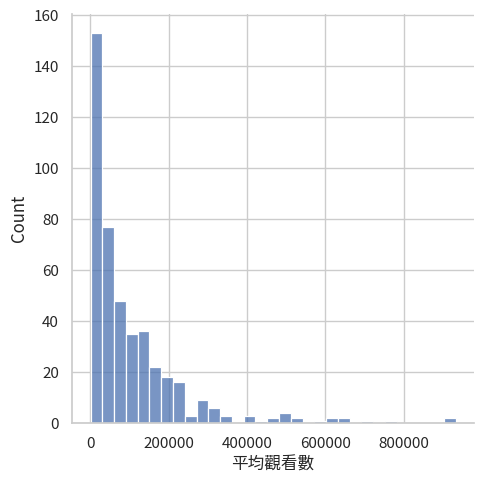

In [41]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid", {"font.sans-serif": ['Taipei Sans TC Beta']})
sns.displot(data=df, x='平均觀看數')

In [15]:
df1 = df.loc[df['平均觀看數'] > 400000].sort_values('平均觀看數', ascending=False)
df1.head(30)

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
355,458,咒術迴戰,22381000,932542,2020,秋番,24,4.9,20200,朴性厚,羚邦,MAPPA,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,新作
197,244,鬼滅之刃 遊郭篇,10212000,928364,2021,秋番,11,4.9,17959,外崎春雄,木棉花,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作
390,513,輝夜姬想讓人告白～天才們的戀愛頭腦戰～ 第二季,9306000,775500,2020,春番,12,5.0,20191,畠山守,木棉花,A-1 Pictures,校園,喜劇,戀愛,NaN,NaN,NaN,漫畫改編,續作
152,185,SPY×FAMILY 間諜家家酒,17603000,704120,2022,春番,25,4.9,52703,古橋一浩,木棉花,WIT STUDIO×CloverWorks,動作,喜劇,親情,NaN,NaN,NaN,漫畫改編,續作
3,4,【我推的孩子】,7065000,642273,2023,春番,11,4.9,52618,平牧大輔,羚邦,動畫工房 (DOGAKOBO),親情,偶像,懸疑,NaN,NaN,NaN,漫畫改編,新作
185,227,戀上換裝娃娃,7591000,632583,2022,冬番,12,5.0,41233,篠原啓輔,木棉花,CloverWorks,校園,戀愛,青春,NaN,NaN,NaN,漫畫改編,新作
90,100,孤獨搖滾！,7579000,631583,2022,秋番,12,5.0,44820,齋藤圭一郎,曼迪,CloverWorks,校園,喜劇,青春,勵志,音樂,NaN,漫畫改編,新作
321,409,關於我轉生變成史萊姆這檔事 第二季,16078000,618385,2021,冬番,26,4.8,14097,中山敦史,木棉花,8bit,冒險,奇幻,異世界,魔法,喜劇,NaN,小說改編,續作
328,421,進擊的巨人 The Final Season,17210000,593448,2020,秋番,29,4.9,24841,林祐一郎,木棉花,MAPPA,動作,冒險,戰爭,血腥暴力,NaN,NaN,原創作品,新作
303,391,無職轉生，到了異世界就拿出真本事,12968000,540333,2021,冬番,24,4.9,25806,岡本学,木棉花,StudioBind,動作,冒險,奇幻,異世界,魔法,NaN,小說改編,續作


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 355 to 151
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      21 non-null     int64  
 1   動畫名     21 non-null     object 
 2   總觀看數    21 non-null     int64  
 3   平均觀看數   21 non-null     int64  
 4   年份      21 non-null     int64  
 5   月份      21 non-null     object 
 6   集數      21 non-null     int64  
 7   星級      21 non-null     float64
 8   評分人數    21 non-null     int64  
 9   導演監督    21 non-null     object 
 10  台灣代理    21 non-null     object 
 11  製作廠商    21 non-null     object 
 12  作品分類1   21 non-null     object 
 13  作品分類2   21 non-null     object 
 14  作品分類3   20 non-null     object 
 15  作品分類4   12 non-null     object 
 16  作品分類5   7 non-null      object 
 17  作品分類6   2 non-null      object 
 18  原作載體    21 non-null     object 
 19  新續作     21 non-null     object 
dtypes: float64(1), int64(6), object(13)
memory usage: 4.0+ KB


In [59]:
df1['平均觀看數'].describe()

count        21.000000
mean     576673.000000
std      154127.352744
min      407615.000000
25%      478385.000000
50%      532583.000000
75%      632583.000000
max      932542.000000
Name: 平均觀看數, dtype: float64

<Axes: ylabel='平均觀看數'>

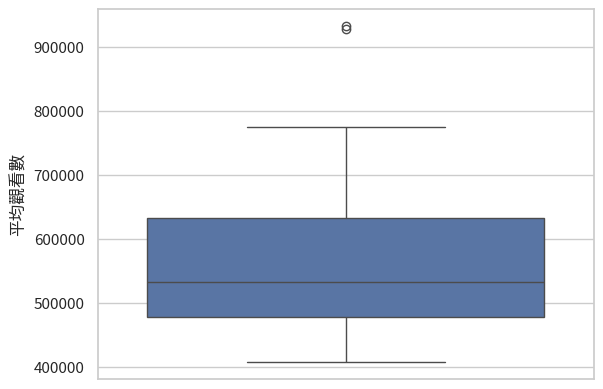

In [42]:
sns.boxplot(data=df1['平均觀看數'])

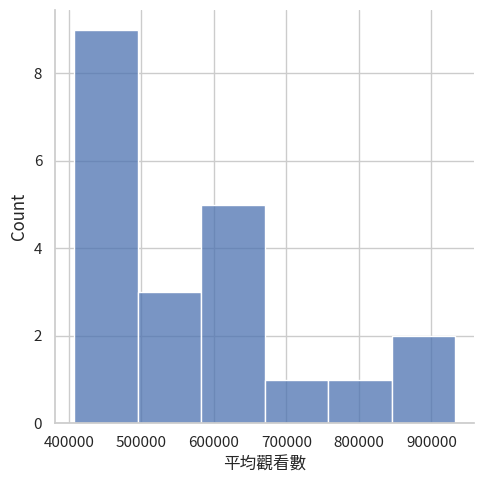

In [16]:
sns.displot(data=df1, x='平均觀看數')

In [24]:
df2 = df.loc[(df.平均觀看數 <= 400000) & (df.平均觀看數 > 100000)
             ].sort_values('平均觀看數', ascending=False)
df2

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
371,492,出租女友,4255000,354583,2020,夏番,12,4.7,7435,古賀一臣,木棉花,TMS ENTERTAINMENT,喜劇,戀愛,青春,NaN,NaN,NaN,漫畫改編,續作
129,148,OVERLORD 第四季,4503000,346385,2022,夏番,13,4.9,14693,伊藤尚往,羚邦,MADHOUSE,冒險,奇幻,異世界,魔法,NaN,NaN,原創作品,新作
284,359,Vivy -Fluorite Eye's Song-,4844000,346000,2021,春番,14,4.9,20093,江崎慎平,木棉花,WIT STUDIO,動作,科幻,音樂,NaN,NaN,NaN,原創作品,新作
312,400,轉生成蜘蛛又怎樣！,7802000,325083,2021,冬番,24,4.0,6972,板垣伸,羚邦,Millepensee,動作,冒險,奇幻,時間穿越,NaN,NaN,小說改編,新作
349,452,在地下城尋求邂逅是否搞錯了什麼 第三季,4113000,316385,2020,秋番,13,4.8,5474,橘秀樹,木棉花,J.C.STAFF,動作,冒險,奇幻,NaN,NaN,NaN,小說改編,續作
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,231,擅長捉弄人的高木同學 第三季,1231000,102583,2022,冬番,12,5.0,10857,赤城博昭,木棉花,シンエイ動画,校園,喜劇,戀愛,青春,NaN,NaN,漫畫改編,續作
166,199,處刑少女的生存之道,1228000,102333,2022,春番,12,4.7,6245,川崎芳樹,羚邦,J.C.STAFF,動作,異世界,血腥暴力,NaN,NaN,NaN,小說改編,新作
357,460,BURN THE WITCH 龍與魔女,306000,102000,2020,秋番,3,4.8,1807,川野達朗,木棉花,teamヤマヒツヂ／スタジオコロリド,動作,魔法,校園,NaN,NaN,NaN,漫畫改編,新作
85,95,鏈鋸人,1219000,101583,2022,秋番,12,4.8,11573,中山龍,羚邦,MAPPA,動作,血腥暴力,NaN,NaN,NaN,NaN,漫畫改編,新作


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 371 to 167
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      138 non-null    int64  
 1   動畫名     138 non-null    object 
 2   總觀看數    138 non-null    int64  
 3   平均觀看數   138 non-null    int64  
 4   年份      138 non-null    int64  
 5   月份      138 non-null    object 
 6   集數      138 non-null    int64  
 7   星級      138 non-null    float64
 8   評分人數    138 non-null    int64  
 9   導演監督    138 non-null    object 
 10  台灣代理    138 non-null    object 
 11  製作廠商    138 non-null    object 
 12  作品分類1   138 non-null    object 
 13  作品分類2   138 non-null    object 
 14  作品分類3   116 non-null    object 
 15  作品分類4   59 non-null     object 
 16  作品分類5   20 non-null     object 
 17  作品分類6   1 non-null      object 
 18  原作載體    138 non-null    object 
 19  新續作     138 non-null    object 
dtypes: float64(1), int64(6), object(13)
memory usage: 22.6+ KB


In [60]:
df2['平均觀看數'].describe()

count       138.000000
mean     178525.811594
std       64255.064799
min      101000.000000
25%      128979.750000
50%      159200.000000
75%      212833.250000
max      354583.000000
Name: 平均觀看數, dtype: float64

<Axes: ylabel='平均觀看數'>

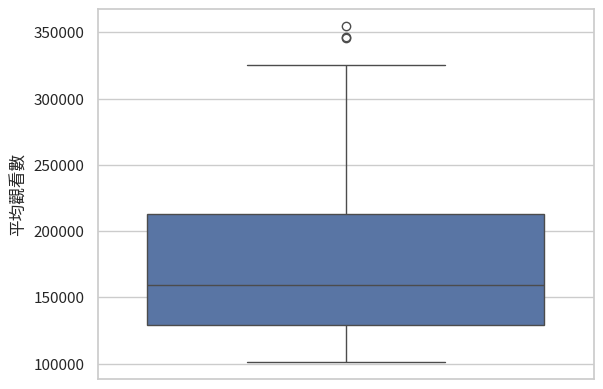

In [43]:
sns.boxplot(data=df2['平均觀看數'])

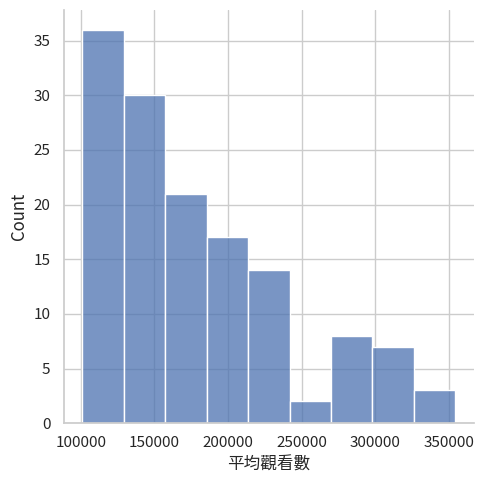

In [26]:
sns.displot(data=df2, x='平均觀看數')

In [29]:
df3 = df.loc[(df.平均觀看數 <= 100000) & (df.平均觀看數 > 10000)
             ].sort_values('平均觀看數', ascending=False)

df3

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
71,74,小智是女孩啦！,1293000,99462,2023,冬番,13,4.9,7482,難波日登志,曼迪,Lay-duce,校園,戀愛,NaN,NaN,NaN,NaN,漫畫改編,新作
127,146,異世界迷宮裡的後宮生活,1179000,98250,2022,夏番,12,4.2,4595,龍輪直征,羚邦,パッショーネ,冒險,奇幻,異世界,NaN,NaN,NaN,小說改編,新作
363,468,大貴族,1360000,97143,2020,秋番,14,4.7,1356,多田俊介、山本靖貴,木棉花,Production I.G,冒險,奇幻,校園,NaN,NaN,NaN,漫畫改編,新作
251,318,死神少爺與黑女僕,1165000,97083,2021,夏番,12,4.9,4556,山川吉樹,羚邦,J.C.STAFF,奇幻,喜劇,戀愛,NaN,NaN,NaN,漫畫改編,續作
68,69,冰劍的魔術師將要統一世界,1157000,96417,2023,冬番,12,3.3,5841,高田昌弘,羚邦,CLOUD HEARTS,冒險,奇幻,NaN,NaN,NaN,NaN,小說改編,新作
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,54,D4DJ All Mix,124000,10333,2023,冬番,12,4.9,941,水島精二、鈴木大介,羚邦,三次元,校園,青春,偶像,音樂,NaN,NaN,遊戲改編,續作
270,345,美麗新世界 The Animation,124000,10333,2021,春番,12,3.9,278,市川量也,羚邦,DOMERICA × SHIN-EI ANIMATION,動作,NaN,NaN,NaN,NaN,NaN,原創作品,新作
311,399,Praeter 之傷,134000,10308,2021,冬番,13,3.6,227,鈴木信吾,木棉花,GoHands,動作,NaN,NaN,NaN,NaN,NaN,原創作品,新作
121,138,幕末替身傳說,123000,10250,2022,夏番,12,3.1,1129,平川哲生,羚邦,GENO STUDIO,動作,冒險,歷史,NaN,NaN,NaN,原創作品,新作


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 71 to 9
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      228 non-null    int64  
 1   動畫名     228 non-null    object 
 2   總觀看數    228 non-null    int64  
 3   平均觀看數   228 non-null    int64  
 4   年份      228 non-null    int64  
 5   月份      228 non-null    object 
 6   集數      228 non-null    int64  
 7   星級      228 non-null    float64
 8   評分人數    228 non-null    int64  
 9   導演監督    227 non-null    object 
 10  台灣代理    228 non-null    object 
 11  製作廠商    228 non-null    object 
 12  作品分類1   228 non-null    object 
 13  作品分類2   220 non-null    object 
 14  作品分類3   143 non-null    object 
 15  作品分類4   56 non-null     object 
 16  作品分類5   16 non-null     object 
 17  作品分類6   1 non-null      object 
 18  原作載體    228 non-null    object 
 19  新續作     228 non-null    object 
dtypes: float64(1), int64(6), object(13)
memory usage: 37.4+ KB


In [61]:
df3['平均觀看數'].describe()

count      228.000000
mean     42487.122807
std      24614.496832
min      10125.000000
25%      20062.250000
50%      38917.000000
75%      61692.500000
max      99462.000000
Name: 平均觀看數, dtype: float64

<Axes: ylabel='平均觀看數'>

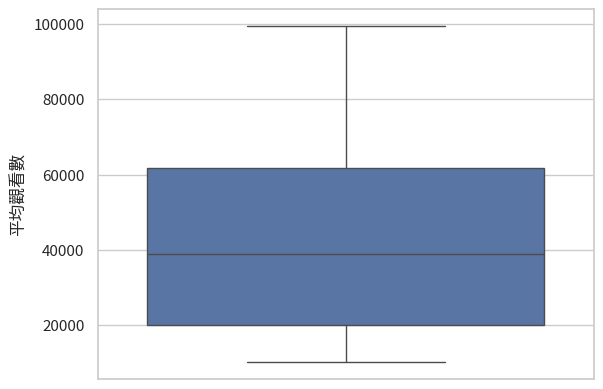

In [44]:
sns.boxplot(data=df3['平均觀看數'])

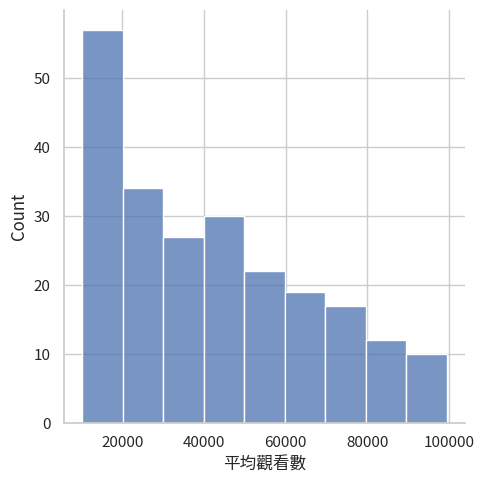

In [30]:
sns.displot(data=df3, x='平均觀看數')

In [34]:
df4 = df.loc[df['平均觀看數'] <= 10000].sort_values('平均觀看數', ascending=False)
df4

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
433,568,搖滾少女!! 活力棉花糖!!,119000,9917,2020,冬番,12,4.8,355,孫承希,羚邦,Kinema Citrus,青春,偶像,音樂,NaN,NaN,NaN,遊戲改編,續作
170,210,川尻小玉的懶散生活,238000,9917,2022,冬番,24,4.6,975,金子伸吾,提恩傳媒,Lapin Track,喜劇,泡麵番,NaN,NaN,NaN,NaN,漫畫改編,新作
300,387,闇芝居 第八季,127000,9769,2021,冬番,13,2.8,253,ILCA,木棉花,ILCA,懸疑,靈異神怪,泡麵番,NaN,NaN,NaN,改編作品,續作
389,512,啄木鳥偵探社,117000,9750,2020,春番,12,4.5,291,江崎慎平,木棉花,LIDENFILMS,推理,懸疑,NaN,NaN,NaN,NaN,小說改編,新作
324,412,幼女社長,140000,9333,2021,冬番,15,4.7,384,いわたかずや,羚邦,project No.9,喜劇,悠閒,職場,泡麵番,NaN,NaN,漫畫改編,新作
369,490,忍者收藏,117000,9000,2020,夏番,13,3.4,342,梅津智史、船田晃,木棉花,テレビ東京,靈異神怪,泡麵番,NaN,NaN,NaN,NaN,原創作品,新作
176,218,幻想三國誌 — 天元靈心記,107000,8917,2022,冬番,12,3.4,732,町谷俊輔,羚邦,GEEKTOYS,冒險,奇幻,NaN,NaN,NaN,NaN,遊戲改編,新作
28,29,絆之 Allele,103000,8583,2023,春番,12,4.2,1251,駒屋健一郎,提恩傳媒,WIT STUDIO×SIGNAL.MD,校園,偶像,音樂,NaN,NaN,NaN,原創作品,新作
205,259,四季櫻,101000,8417,2021,秋番,12,3.7,325,須貝真也,杰外,サブリメイション,冒險,科幻,NaN,NaN,NaN,NaN,原創作品,新作
212,268,橘色榮耀！,100000,8333,2021,秋番,12,4.5,440,安齋剛文,羚邦,C2C,校園,運動,NaN,NaN,NaN,NaN,原創作品,新作


In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 433 to 413
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      60 non-null     int64  
 1   動畫名     60 non-null     object 
 2   總觀看數    60 non-null     int64  
 3   平均觀看數   60 non-null     int64  
 4   年份      60 non-null     int64  
 5   月份      60 non-null     object 
 6   集數      60 non-null     int64  
 7   星級      60 non-null     float64
 8   評分人數    60 non-null     int64  
 9   導演監督    59 non-null     object 
 10  台灣代理    60 non-null     object 
 11  製作廠商    60 non-null     object 
 12  作品分類1   60 non-null     object 
 13  作品分類2   60 non-null     object 
 14  作品分類3   40 non-null     object 
 15  作品分類4   13 non-null     object 
 16  作品分類5   1 non-null      object 
 17  作品分類6   0 non-null      object 
 18  原作載體    60 non-null     object 
 19  新續作     60 non-null     object 
dtypes: float64(1), int64(6), object(13)
memory usage: 9.8+ KB


In [62]:
df4['平均觀看數'].describe()

count      60.000000
mean     5403.183333
std      2750.620691
min       280.000000
25%      3062.250000
50%      6258.000000
75%      7100.750000
max      9917.000000
Name: 平均觀看數, dtype: float64

<Axes: ylabel='平均觀看數'>

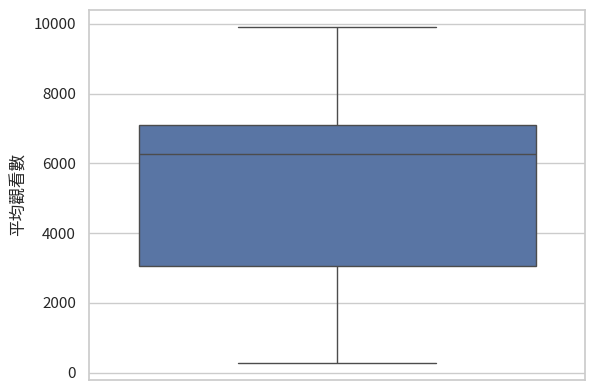

In [45]:
sns.boxplot(data=df4['平均觀看數'])
df4['平均觀看數'].max()

AttributeError: 'FacetGrid' object has no attribute 'set_xticks'

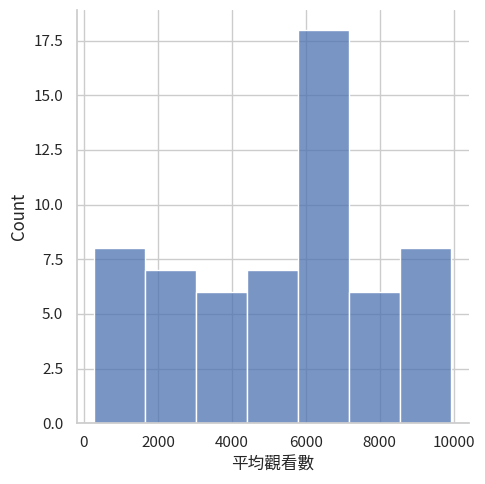

In [64]:
hist4 = sns.displot(data=df4, x='平均觀看數')
# set the ticks first
hist4.set_xticks(range(20))

# set the labels
hist4.set_xticklabels([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500,
                       5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000])